<a href="https://colab.research.google.com/github/quangphuc2509/AI-Homework/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
%cd /content/drive/MyDrive/Kiemtragiuaky/flower

/content/drive/MyDrive/Kiemtragiuaky/flower


In [5]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/Kiemtragiuaky/flower/train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')

Found 5000 images belonging to 5 classes.


In [7]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}

In [8]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

In [9]:
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1)

Epoch 1/50
157/157 [==============================] - 1480s 9s/step - loss: 4.5777 - accuracy: 0.4124
Epoch 2/50
157/157 [==============================] - 63s 404ms/step - loss: 1.0901 - accuracy: 0.5646
Epoch 3/50
157/157 [==============================] - 61s 392ms/step - loss: 0.9666 - accuracy: 0.6244
Epoch 4/50
157/157 [==============================] - 63s 402ms/step - loss: 0.8657 - accuracy: 0.6586
Epoch 5/50
157/157 [==============================] - 63s 401ms/step - loss: 0.7814 - accuracy: 0.6970
Epoch 6/50
157/157 [==============================] - 63s 398ms/step - loss: 0.7106 - accuracy: 0.7304
Epoch 7/50
157/157 [==============================] - 62s 396ms/step - loss: 0.6299 - accuracy: 0.7590
Epoch 8/50
157/157 [==============================] - 63s 404ms/step - loss: 0.5592 - accuracy: 0.7904
Epoch 9/50
157/157 [==============================] - 63s 398ms/step - loss: 0.5148 - accuracy: 0.8060
Epoch 10/50
157/157 [==============================] - 62s 397ms/step - lo

In [10]:
model.save('/content/drive/MyDrive/Kiemtragiuaky/flower/flower.h5')

In [11]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.05192907899618149
Train Accuracy 0.9824000000953674


In [12]:
model_1=load_model('/content/drive/MyDrive/Kiemtragiuaky/flower/flower.h5')

1/1 [==============================] - 0s 27ms/step
Orchid


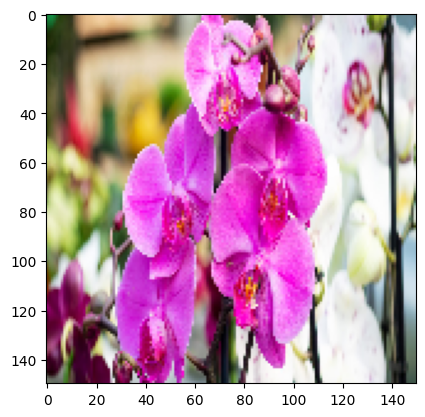

1/1 [==============================] - 0s 32ms/step
Tulip


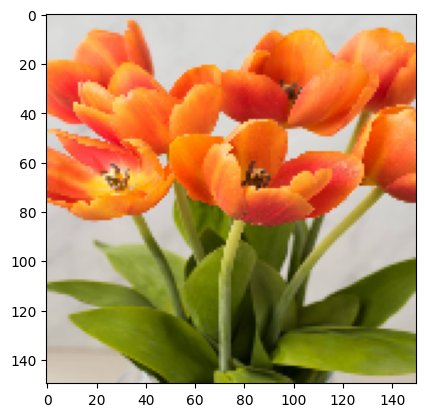

1/1 [==============================] - 0s 28ms/step
Sunflower


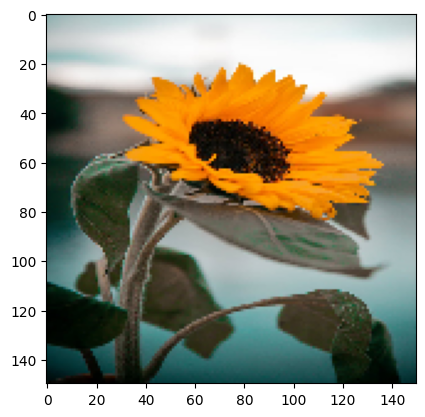

1/1 [==============================] - 0s 48ms/step
Lilly


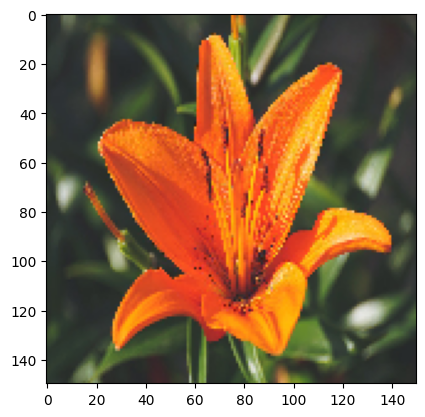

1/1 [==============================] - 0s 34ms/step
Tulip


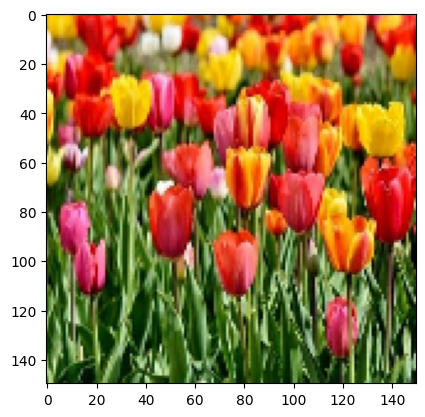

1/1 [==============================] - 0s 20ms/step
Lilly


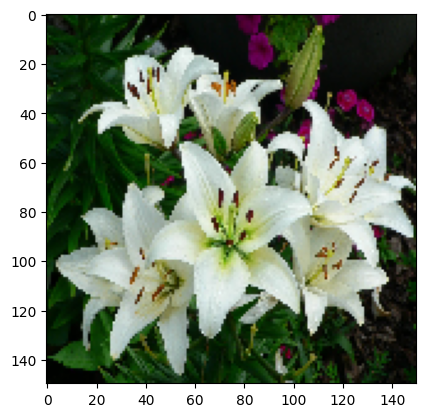

1/1 [==============================] - 0s 22ms/step
Lotus


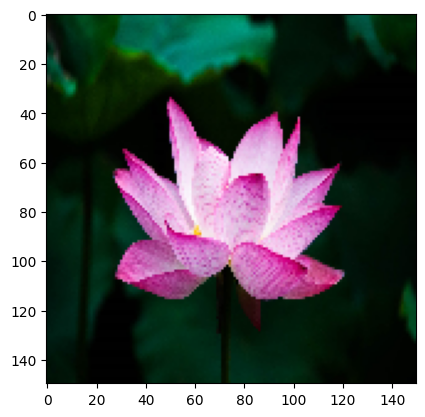

1/1 [==============================] - 0s 33ms/step
Sunflower


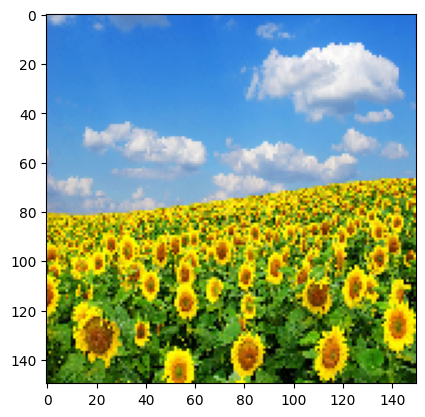

1/1 [==============================] - 0s 23ms/step
Lilly


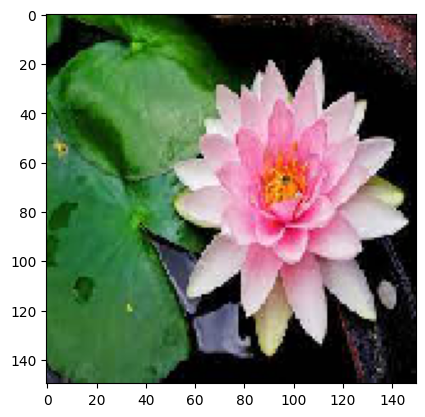

1/1 [==============================] - 0s 21ms/step
Lotus


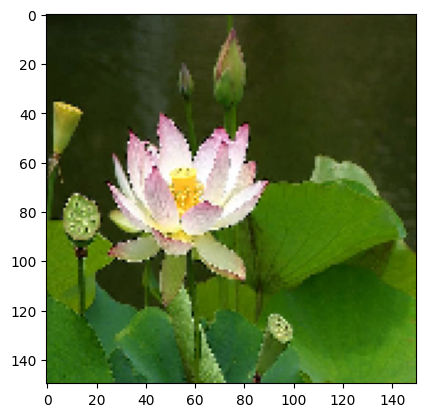

In [16]:
test="/content/drive/MyDrive/Kiemtragiuaky/flower/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Lilly','Lotus','Orchid','Sunflower','Tulip']
  print(class_name[result])
  plt.show()